Краевая задача

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

In [52]:
left_cond = {"x": 0, "U": -1}
right_cond = {"x": 1, "U": 0}

In [3]:
class edge_problem:
    def __init__(self, p, q, f, left_cond, right_cond):
        self.p = p
        self.q = q
        self.f = f
        self.left_cond = left_cond
        self.right_cond = right_cond
    

In [26]:
class Shooting:
    def __init__(self, edge_problem):
        self.p = edge_problem.p
        self.q = edge_problem.q
        self.f = edge_problem.f
        self.left_cond = edge_problem.left_cond
        self.right_cond = edge_problem.right_cond
#         self.A = np.array([[-p, -q], [1, 0]])
        self.x_band = (self.left_cond["x"], self.right_cond["x"])
    
    def two_dim_form(self, x, y):
        return np.array([-self.p(x) * y[0] - self.q * y[1] + self.f(x), y[0]])        
    
    def shoot(self, der_0, max_step):
        y0 = np.array([der_0, self.left_cond["U"]])
        shot = scipy.integrate.solve_ivp(self.two_dim_form, self.x_band, y0, method='RK45', max_step=max_step)
        plt.figure(figsize = [5, 5])
        plt.title('Shot')
        print(shot.y.shape)
        plt.plot(shot.t, shot.y[1, :])
        
        
    
    def solve(self):
        pass
    
    

In [20]:
def f(x):
    return 0

In [21]:
def p(x):
    return 0

In [53]:
problem = edge_problem(p, -1, f, left_cond, right_cond)

In [54]:
shooting = Shooting(problem)

(2, 10002)


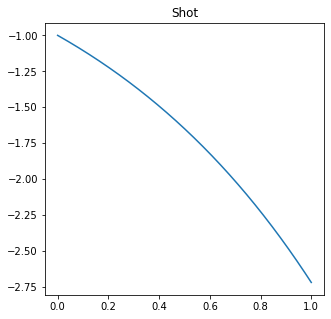

In [55]:
shooting.shoot(-1, 1e-4)

In [12]:
def presize_solution(x):
    return (1-1.5*np.pi)*np.sin(x)/x + np.cos(x)/x + 1/x

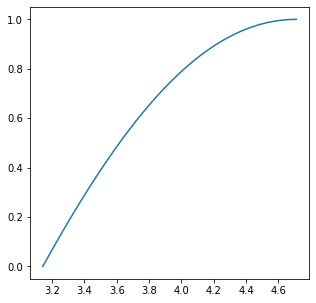

In [14]:
plt.figure(figsize=[5, 5])
x_band = np.linspace(np.pi, 1.5*np.pi, 1000)
plt.plot(x_band, presize_solution(x_band))